<a href="https://colab.research.google.com/github/piquelab/popgen-notes/blob/master/colab/QT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Covariance of phenotypes between pairs of individuals of a given relatedness
---

This google colab has been created from code modified from Graham Coop [here](https://github.com/cooplab/popgen-notes/blob/master/Rcode/Quant_gen/QT4.R)

Each point gives the phenotypes of a different pair of indi- viduals. The additive genetic variance is held constant at $V_A$ = 1, such that the expected covariances ($2F_{1,2}V_A$) should be 1, 0.5, 0.25, and 0.125 re- spectively in good agreement with the empirical covariances reported in the title of each graph. The data were simulated as described in the caption of Figure 7.5. The dashed red line shows x = y and the solid blue line shows the best fitting linear regression line.


In [3]:
install.packages("plotrix")
library("plotrix")

##Paste this in first
genetic.covar<-function(L=20, environ.var,Num_inds=5000,print.slope=FALSE,sel.cutoff=FALSE,ibd.prob,relly.type=""){
	##Quantitative genetics sims
	allele.freq<-0.5   ###each locus is assumed to have the same allele frequencies. This is just to simplify the coding, in reality these results work when each locus has its own frequency (and the coding wouldn't be too much harder).
	 stopifnot(sum(ibd.prob)==1)


	##MAKE A IND 1ss
	## For each ind, at each locus we draw an allele (either 0 or 1) from the population allele frequency.
	##We do this twice for each ind two represent the two haplotypes in the mother
	ind.hap.1<-replicate(Num_inds, rbinom(L,1,allele.freq) )
	ind.hap.2<-replicate(Num_inds, rbinom(L,1,allele.freq) )
	##type mum.hap.1[,1] to see the 1st mothers 1st haplotype

	##Each mothers genotype at each locus is either 0,1,2
	ind.geno<-ind.hap.1+ind.hap.2

	additive.genetic<-colSums(ind.geno)
	genetic.sd<-sd(additive.genetic)
	mean.genetic<-mean(additive.genetic)

	additive.genetic<-additive.genetic / sd(additive.genetic)
	ind.pheno<- additive.genetic + rnorm(Num_inds,sd=sqrt(environ.var))
	ind.pheno<-ind.pheno-mean(ind.pheno)

	##MAKE A IND 2's
	###routine to generate genotypes for set of 2nd individual based on our genotypes for first
	other.ind.geno<-sapply(1:Num_inds,function(ind){
		sapply(1:L,function(snp){
			num.ibd<-sample(0:2,1,prob=ibd.prob)
			if(num.ibd==0){my.geno<-sum(rbinom(2,1,allele.freq))}
			if(num.ibd==1){my.geno<-ind.hap.1[snp,ind]+rbinom(1,1,allele.freq)}
			if(num.ibd==2){my.geno<-ind.geno[snp,ind]}
			return(my.geno)
		})
	})

	other.ind.additive.genetic<-colSums(other.ind.geno)
	genetic.sd<-sd(other.ind.additive.genetic)
	mean.genetic<-mean(other.ind.additive.genetic)
	other.ind.additive.genetic<-other.ind.additive.genetic / sd(other.ind.additive.genetic)
	other.pheno<- other.ind.additive.genetic + rnorm(Num_inds,sd=sqrt(environ.var))
	other.pheno<-other.pheno-mean(other.pheno)
	my.cov<-cov(ind.pheno,other.pheno);

	plot(ind.pheno,other.pheno,xlab="Ind 1's phenotype",ylab="Ind 2's phenotype",cex=1.5,cex.axis=1.5,cex.main=1.5,cex.lab=1.5,
	main=paste(relly.type,"Cov=",format(my.cov,digit=3),sep=" "),col=adjustcolor("black",0.4)) #,"L =",L,"VE=",environ.var,"VA=1",sep=", "))
	abline(h=0,col="grey",lwd=2)
	abline(v=0,col="grey",lwd=2)
	abline(lm(other.pheno~ind.pheno),col="blue",lwd=2)
	abline(0,1,col="red",lwd=3,lty=2)
 #	textbox(x=min(ind.pheno)*.5,y=max(other.pheno)*.9,textlist=c("Cov= ",format(my.cov,digit=3)),col="red"))
 #legend(x="topleft",legend=paste("Cov= ",format(my.cov,digit=2)),col="red",lwd=4,cex=1.5,bg="white",pch=NA,lty=NA)
	#text(x=min(ind.pheno)*.5,y=max(other.pheno)*.9,label=paste("Cov= ",format(my.cov,digit=3)),col="red",lwd=4,cex=1.5)
	cat("pheno. covariance=",my.cov,"\n")
	cat("Expected covar=",sum(ibd.prob*c(0,0.5,1)),"\n")
	VA<-my.cov/sum(ibd.prob*c(0,0.5,1))
	cat("VA= ", VA,"h2= ",VA/var(c(ind.pheno,other.pheno)),"\n")
 }




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



pheno. covariance= 1.093986 
Expected covar= 1 
VA=  1.093986 h2=  0.8466219 


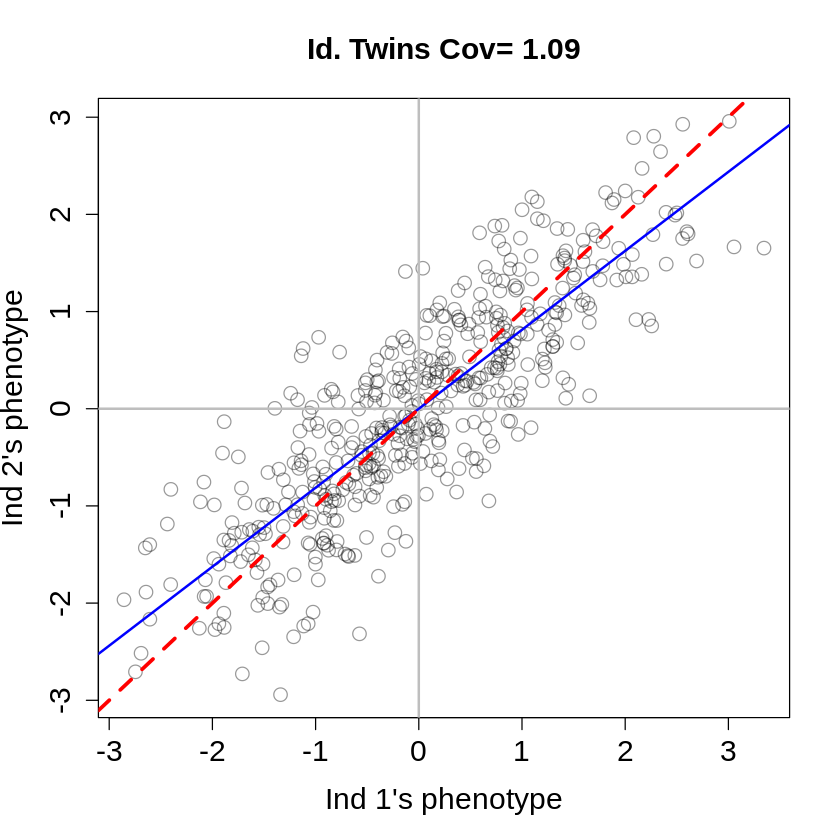

pheno. covariance= 0.4762692 
Expected covar= 0.5 
VA=  0.9525384 h2=  0.8113021 


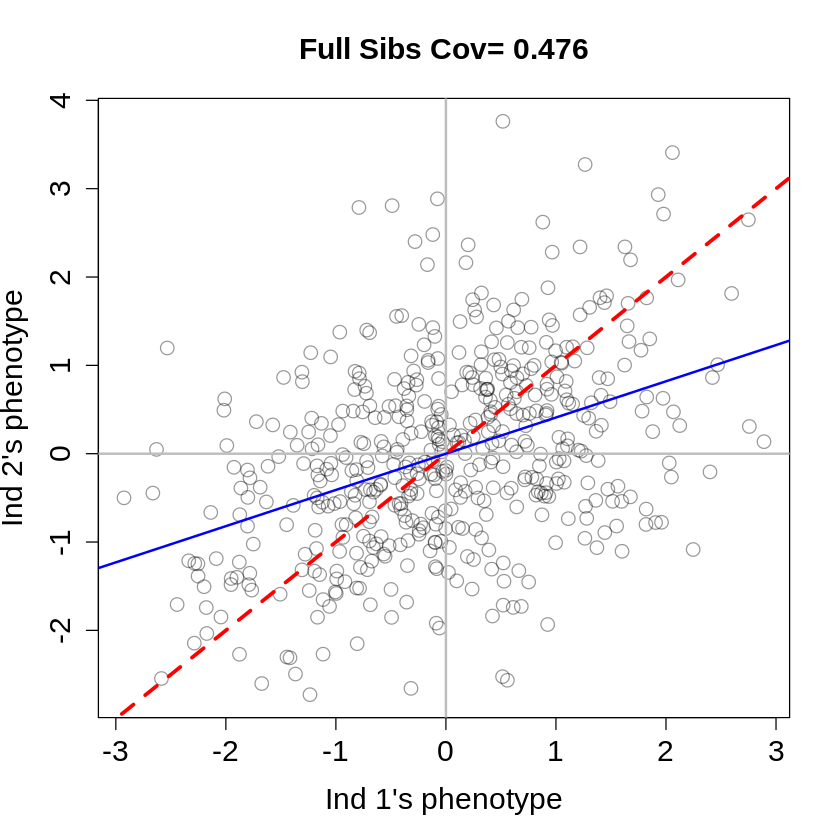

pheno. covariance= 0.231351 
Expected covar= 0.25 
VA=  0.9254041 h2=  0.7804087 


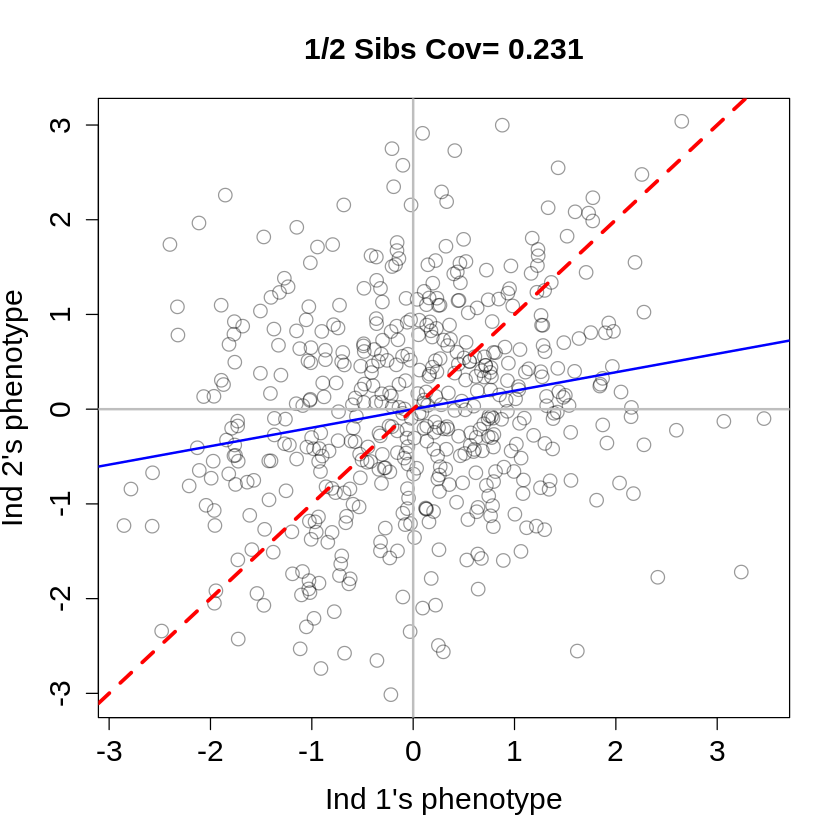

pheno. covariance= 0.1173181 
Expected covar= 0.125 
VA=  0.938545 h2=  0.7768489 


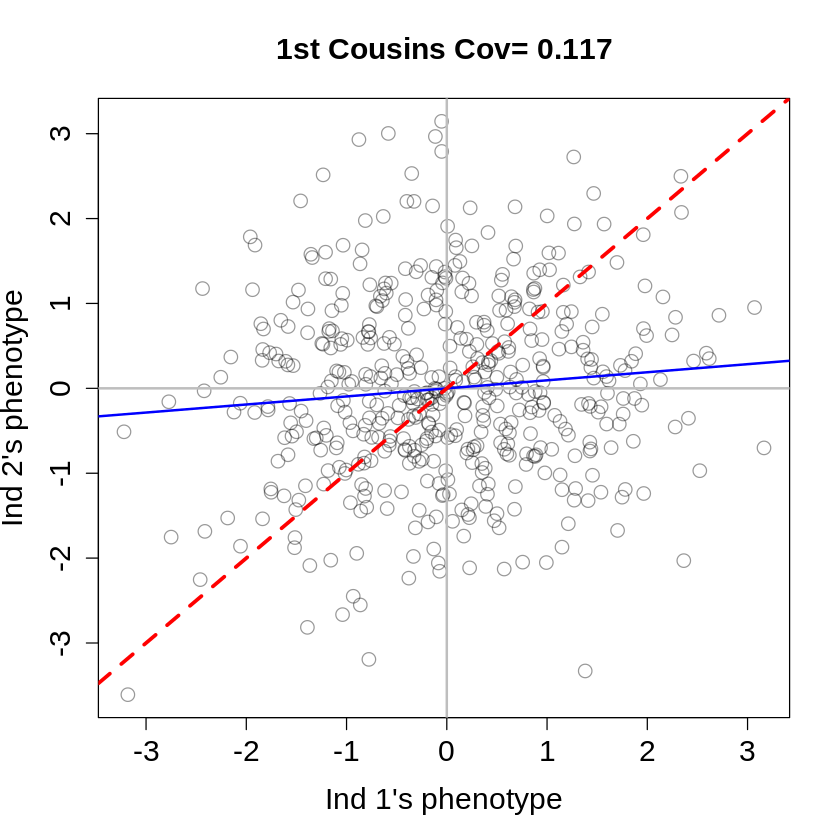

In [5]:
#layout(t(1:4))
genetic.covar(L=100, environ.var=0.2,Num_inds=500,ibd.prob=c(0.,0.,1),relly.type="Id. Twins")
genetic.covar(L=100, environ.var=0.2,Num_inds=500,ibd.prob=c(0.25,0.5,0.25),relly.type="Full Sibs")
genetic.covar(L=100, environ.var=0.2,Num_inds=500,ibd.prob=c(0.5,0.5,0),relly.type="1/2 Sibs")
genetic.covar(L=100, environ.var=0.2,Num_inds=500,ibd.prob=c(0.75,0.25,0.0),relly.type="1st Cousins")
